In [1]:
from itertools import permutations

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from qiskit import (
    Aer, 
    BasicAer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    execute,
    transpile,
)
from qiskit.algorithms.minimum_eigensolvers import (
    QAOA,
    NumPyMinimumEigensolver,
    SamplingVQE,
)
from qiskit.algorithms.optimizers import COBYLA, SPSA
from qiskit.circuit.library import RealAmplitudes, TwoLocal
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram
from qiskit.utils import algorithm_globals
from qiskit.visualization import (
    plot_bloch_multivector,
    plot_bloch_vector,
    plot_histogram,
    plot_state_qsphere,
)
from qiskit_aer import Aer, AerSimulator
from qiskit_aer.noise import NoiseModel, pauli_error, thermal_relaxation_error
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import (
    GroverOptimizer,
    MinimumEigenOptimizer,
    SlsqpOptimizer,
    WarmStartQAOAOptimizer,
)
from qiskit_optimization.applications import Tsp
from qiskit_optimization.converters import QuadraticProgramToQubo

sim = Aer.get_backend("aer_simulator")

## Q1 量子回路の作成・プロット
4個の量子ビットを持つ量子レジスタと4個の古典ビットを持つ古典レジスタから構成される量子回路を作成し、回路図をプロットせよ。ただし、量子レジスタの名前を`QR`、古典レジスタの名前を`CR`とすること。

## Q2 測定
4個の量子ビットを持つ量子レジスタ`QR`の第0量子ビットを測定し、結果を4個古典ビットを持つ古典レジスタ`CR`の第0古典ビットに格納する量子回路を作成せよ。また、作成した量子回路の回路図をプロットせよ。

## Q3 状態ベクトルから確率算出
下記の量子回路において、量子ビットを測定した結果として$|0\rangle$が得られる確率を、状態ベクトルから算出せよ。

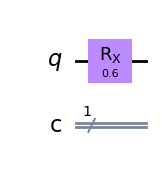

In [4]:
qc = QuantumCircuit(1, 1)
qc.rx(theta=0.6, qubit=0)
qc.draw(output="mpl")

## Q4 $|0\rangle$状態が得られる確率
Q3の量子回路において、量子ビットを測定した結果として$|0\rangle$が得られる確率を、量子ビットを測定する量子回路を作成し、シミュレーターを用いて確率を算出せよ。

## Q5 2量子ビット回路の作成
 2量子ビットの回路を作成し、両方の量子ビットを|0⟩状態から|1⟩状態に変更せよ。

## Q6 アダマールゲート(1)
1量子ビットを用意し、アダマールゲートを適用して量子状態を求めるプログラムを作成せよ。また、測定操作を行った際の確率分布を出力せよ。

## Q7 アダマールゲート(2)
2量子ビットの回路を作成し、アダマールゲートを使用して2つの量子ビットを重ね合わせ状態にせよ。

## Q8 アダマールゲート(3)
3つの量子ビットを持つ回路を作成し、重ね合わせ状態を作れ。具体的には、初期量子ビットが|0>の状態で、各ビットが重ね合わせ状態$(|0\rangle> + |1\rangle>) / \sqrt(2)$になるせよ。

## Q9 CNOTゲート
2量子ビットの回路を作成し、CNOTゲートを使用して1つの量子ビットの状態でもう一方の量子ビットを反転させなさい。

## Q10 期待値計算(1)
下記の量子回路で表される状態ベクトルにおけるパウリ行列`X`の期待値を計算する量子回路を作成せよ。また、作成した量子回路の回路図をプロットせよ。

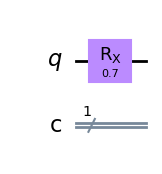

In [12]:
qc = QuantumCircuit(1, 1)
qc.rx(theta=0.7, qubit=0)
qc.draw(output="mpl")

## Q11 期待値計算(2)
Q5に作成した量子回路を用いて、パウリ行列`X`の期待値をシミュレーターを用いて計算せよ。

## Q12 期待値計算(3)

任意の量子ビット状態$|q\rangle$ (計算基底)に対するパウリ演算子の期待値を表せ。例としてパウリZゲートの期待値の場合を示す。

$$
\begin{align}
\langle Z \rangle &=\langle q | Z | q\rangle =\langle q|0\rangle\langle 0|q\rangle - \langle q|1\rangle\langle 1|q\rangle
=|\langle 0 |q\rangle|^2 - |\langle 1 | q\rangle|^2 \tag{1}
\end{align}
$$



$$
\begin{align}
    \langle X \rangle &= \tag{2} \\
    \langle Y \rangle &=  \tag{3} 
\end{align}
$$

## Q13　トフォリゲート (1)

3つの量子ビットを持つ回路を作成し、トフォリゲート（CCXゲート）を使用して、最初の2つのビットが1のときのみ、次のビットにXゲートを適用するようにせよ。

## Q14 トフォリゲート(2)
3量子ビットの回路を作成し、Toffoliゲートと同じ効果を持つゲートを作成し、回路図を描画せよ。

## Q15 トフォリゲート(3)
Q14で作成した回路のシミュレーション結果を描画せよ。

## Q16 トフォリゲート(4)
Q15で作成したゲートがトフォリゲートと同じ結果になるか確認しなさい。

## Q17 エンタングルメント

2量子ビットのエンタングルメントを作成せよ。

## Q18 Bell状態 (1)
Bell状態を作成し、ヒストグラムで表示せよ。

## Q19 Bell状態(2)

$\frac{1}{2}(|01\rangle + |10\rangle)$ のBell状態を作成し、ブロッホ球で表示せよ。

## Q20 Bell状態(3)

$\frac{1}{2}(|01\rangle - |10\rangle)$ のBell状態を作成し、ヒストグラムで表示せよ。

## Q21 Bell状態(4)

2つの量子ビットを持つ回路を作成し、1つ目のビットを|->状態にし、2つ目のビットを|1>状態にし、その後にCNOTゲートを適用し最終的な状態ベクトルを求めよ。

## Q22 GHZ状態 (1)
GHZ状態（Bell状態の3量子ビットへ拡張）を作成し、ヒストグラムで表示せよ。

## Q23 GHZ状態(2)

3つの量子ビットを持つ回路を作成し、以下の操作を行え。
最初のビットにアダマールゲートを適用する。
次の2つのビットには、制御ゲートを使って最初のビットが|0>のときのみXゲートを適用する。
最終的な状態ベクトルを求めよ。

## Q24 GHZ状態(3)
n量子GHZ状態を作成せよ。

## Q25 古典論理ゲート再現(1)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、XORを作成せよ。

In [27]:
def XOR(input1,input2):
    
    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE    
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

## Q26 古典論理ゲート再現(2)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、ANDを作成せよ。

In [29]:
def AND(input1,input2):
    
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

## Q27 古典論理ゲート再現(3)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、NANDを作成せよ。

In [31]:
def NAND(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

## Q28 古典論理ゲート再現(4)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、ORを作成せよ。

In [33]:
def OR(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

## Q29 ノイズモデル(1)
Q24の回路に対して基本ビットフリップエラーノイズモデルを適用し、ノイズがある場合の振る舞いを確認せよ。

## Q30 ノイズモデル(2)
Q24の回路に対してT1/T2 熱緩和モデルを適用し、ノイズがある場合の振る舞いを確認せよ。

## Q31 量子状態の可視化(1)
ブロッホ球で|0>を描画せよ。

## Q32 量子状態の可視化(２)
Bell状態をブロッホ球で表せ。

## Q33 量子状態の可視化(３)
Bell状態をqsphereで表し、ブロッホ球と比べてどのような利点があるか述べよ。

## Q34 グローバー探索
$|111\rangle$状態を増幅する3量子ビットのグローバー探索アルゴリズムを実装せよ。

## Q35 量子ランダムウォーク
 量子ビットを使ったランダムウォークをシミュレートするプログラムを作成せよ。初期状態は|0⟩とし、コインフリップをシミュレートするためにアダマールゲートを使用せよ。指定されたステップ数だけランダムウォークを進め、最終的な確率分布を出力するところまで行え。

このプログラムは、初期状態を|0⟩とし、アダマールゲートを使用してコインフリップをシミュレートしながらランダムウォークを進めます。各ステップで量子ビットの状態を測定し、特定の条件で反転させます。最終的な確率分布を出力し、ヒストグラムとして表示します。必要に応じて、ステップ数やショット数などを調整してカスタマイズできます


## Q36 Quadratic Program
QuadraticProgramクラスを用いて、次の最適化問題を構築しなさい。

maximize $x - 2y$

$x, y \in \lbrace 0, 1\rbrace$


## Q37 MinimumEigenOptimizer (1)
Q36で構築した最適化問題を、MinimumEigenOptimizerを使用して解きなさい。ソルバーにはNumPyMinimumEigensolverを使用しなさい。

## Q38 MinimumEigenOptimizer(2)
Q36で構築した最適化問題を、Q2と同様にMinimumEigenOptimizerを使用して解きなさい。今回はソルバーとしてQAOAを使用しなさい。

## Q39 MinimumEigenOptimizer
Q36で構築した最適化問題を、Q2, Q3と同様にMinimumEigenOptimizerを使用して解きなさい。今回はソルバーとしてSamplingVQEを使用しなさい。

## Q40 WarmStartQAOAOptimizer
Q36で構築した最適化問題を、こんどはWarmStartQAOAOptimizerを使用して解きなさい。ソルバーとしてはSlsqpOptimizerを使用しなさい。

## Q41 GroverOptimizer
Q36で構築した最適化問題を、こんどはGroverOptimizerを使用して解きなさい。Samplerを使用しなさい。

## Q42 巡回セールスマン問題(1)
networkxを用いて3つの地点のグラフを作成せよ。 各ルートには距離の重みづけをランダムに設定せよ。

## Q43 巡回セールスマン問題(2)
Q42をburte force(総当たり)で解きなさい。

## Q44 巡回セールスマン問題(3)
Q42を2次制約問題で表わしなさい

## Q45 巡回セールスマン問題(4)
Q44の結果を2次式をquboで表わしなさい。

## Q46 巡回セールスマン問題(5)
Q45をExactSolverで実行しなさい。

## Q47 巡回セールスマン問題(6)
Q46が正しいコストが与えられているか確認しなさい。

## Q48 巡回セールスマン問題(7)
Q45を量子コンピュータ(シミュレータ)で実行しなさい

In [56]:
algorithm_globals.random_seed = 123
seed = 10598